In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Load the dataset
file_path = r"C:\Users\gaura\Downloads\amazon.csv"
data = pd.read_csv(file_path)

In [ ]:
# Data Cleaning
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

# Remove rows with NaN values in 'category' or 'rating_count'
data_clean = data.dropna(subset=['category', 'rating_count'])

In [ ]:
# 2. Top `rating_count` products by category
top_products_by_category = data_clean.loc[data_clean.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print("\nTop Rating Count Products by Category:")
print(top_products_by_category)


Top Rating Count Products by Category:
                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5

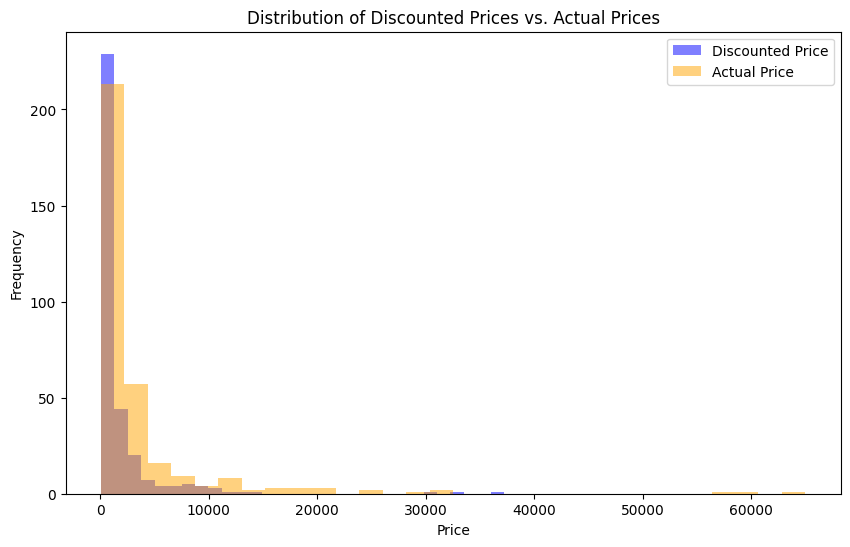

In [ ]:
# 3. Distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
plt.hist(data_clean['discounted_price'].dropna(), bins=30, alpha=0.5, label='Discounted Price', color='blue')
plt.hist(data_clean['actual_price'].dropna(), bins=30, alpha=0.5, label='Actual Price', color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.show()

In [ ]:
# 4. Average discount percentage across categories
average_discount = data_clean.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\nAverage Discount Percentage Across Categories:")
print(average_discount)


Average Discount Percentage Across Categories:
category
Electronics|Headphones,Earbuds&Accessories|Earpads                                                              90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                             90.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads    87.0
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands                          80.0
Computers&Accessories|Components|InternalHardDrives                                                             80.0
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|USBGadgets|Lamps                                                  10.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     0.0
Home&Ki

In [ ]:
# 5. Most popular product names
most_popular_products = data_clean.nlargest(10, 'rating_count')[['product_name', 'rating_count']]
print("\nMost Popular Product Names:")
print(most_popular_products)



Most Popular Product Names:
                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0


In [ ]:
# 6. Most popular product keywords
all_keywords = ' '.join(data_clean['product_name'].dropna()).split()
keyword_counts = Counter(all_keywords).most_common(10)
print("\nMost Popular Product Keywords:")
print(keyword_counts)


Most Popular Product Keywords:
[('for', 183), ('with', 149), ('&', 95), ('and', 75), ('Cable', 74), ('USB', 72), ('|', 71), ('Remote', 64), ('C', 63), ('Compatible', 63)]


In [ ]:
# 7. Most popular product reviews
most_popular_reviews = data_clean.nlargest(10, 'rating_count')[['review_title', 'review_content', 'rating_count']]
print("\nMost Popular Product Reviews:")
print(most_popular_reviews)


Most Popular Product Reviews:
                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
32    Great Cable, Charging Speeds Could Be Better,G...   
151   Great Cable, Charging Speeds Could Be Better,G...   
823   Great Cable, Charging Speeds Could Be Better,G...   
1272  Ok,A good water heater,Easy to use inverter,Go...   
1259  Good product but pipes/installation/plug not i...   
214   Good compatibility,Good Product,Good nice serv...   
1262  It’s a good product in this price.,Nice produc...   

                                         review_content  rating_count  
1279  Does the job well,doesn't work on sand. though...         992.0  
750   Nive,very good batteries received,Like,Good pr...         989.0  
1059  Bottle quality is not good.,Best for hot water...         976.0  
32    Not charging as fast as I

In [ ]:
# 8. Correlation between discounted price and rating
correlation = data_clean['discounted_price'].corr(data_clean['rating'])
print(f"\nCorrelation Between Discounted Price and Rating: {correlation}")



Correlation Between Discounted Price and Rating: 0.08151967980593874


In [ ]:
# 10. Identify potential areas for improvement
low_rated_products = data_clean[data_clean['rating'] < 3.0][['category', 'product_name', 'rating', 'rating_count']]
print("\nLow-Rated Products That May Need Improvement:")
print(low_rated_products)


Low-Rated Products That May Need Improvement:
                                               category  \
545         Electronics|WearableTechnology|SmartWatches   
1243  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1309  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...   
1356  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   

                                           product_name  rating  rating_count  
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...     2.8          87.0  
1243  Personal Size Blender, Portable Blender, Batte...     2.3          13.0  
1286  MR. BRAND Portable USB Juicer Electric USB Jui...     2.8         109.0  
1309  Khaitan ORFin Fan heater for Home and kitchen-...     2.0           2.0  
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...     2.6          24.0  
1449  IONIX Tap filter Multilayer | Activated Carbon...    